# Task 2 :CREDIT CARD FRAUD DETECTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
train_df=pd.read_csv("C:/Users/HP/Downloads/fraudTrain.csv/fraudTrain.csv")

In [4]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
test_df=pd.read_csv(r"C:\Users\HP\Downloads\fraudTest.csv\fraudTest.csv")

In [6]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
train_df.shape

(1296675, 23)

In [8]:
test_df.shape

(555719, 23)

In [9]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [10]:
test_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [11]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
test_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
unwanted_cols=['Unnamed: 0', 'merchant', 'job', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip','dob', 'trans_num','trans_date_trans_time']

In [14]:
#Dropping unwanted columns
train_df = train_df.drop(columns=unwanted_cols)
test_df = test_df.drop(columns=unwanted_cols)

In [15]:
train_df.head()

,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,grocery_pos,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,entertainment,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,gas_transport,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,misc_pos,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [16]:
test_df.head()

,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,personal_care,29.84,F,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,health_fitness,41.28,F,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,misc_pos,60.05,M,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,travel,3.19,M,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


In [17]:
import seaborn as sns

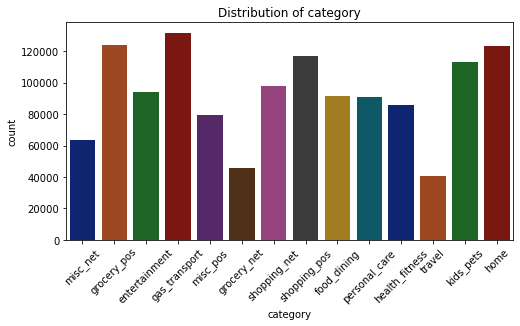

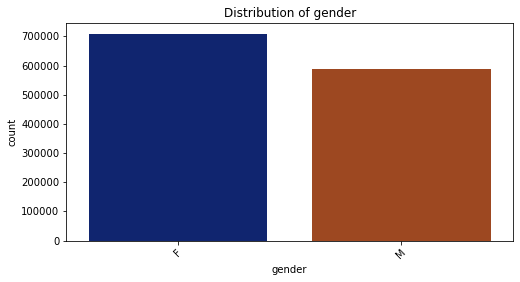

In [18]:
# Explore categorical variables
categorical_col = ['category', 'gender']

for column in categorical_col:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=column, palette='dark')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
#Changing categorical variables to numeric
label_encoder=LabelEncoder()

In [21]:
categorical_col=['category', 'gender']
for column in categorical_col:
    train_df[column] = label_encoder.fit_transform(train_df[column])
    test_df[column] = label_encoder.fit_transform(test_df[column])

In [22]:
train_df.head()

,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,8,4.97,0,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,4,107.23,0,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,0,220.11,1,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,2,45.00,1,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,9,41.96,1,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [23]:
test_df.head()

,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,10,2.86,1,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,10,29.84,0,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,5,41.28,0,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,9,60.05,1,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,13,3.19,1,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


Splitting of dataset

In [24]:
x_train=train_df.iloc[:, 0:-1]
x_test=test_df.iloc[:, 0:-1]
y_train=train_df['is_fraud']
y_test=test_df['is_fraud']

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model building

DECISION TREE

In [30]:
from sklearn import tree

In [31]:
Dtclf=tree.DecisionTreeClassifier()
Dtclf=Dtclf.fit(x_train, y_train)

In [32]:
y_pred=Dtclf.predict(x_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9928938906173803

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[550542   3032]
 [   917   1228]]


In [35]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.29      0.57      0.38      2145

    accuracy                           0.99    555719
   macro avg       0.64      0.78      0.69    555719
weighted avg       1.00      0.99      0.99    555719

